In [1]:
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gseapy
import gc

In [2]:
adata = sc.read('../../../../../../../media/spencer/Seagate Backup Plus Drive/scRNAseq/lung/raw_others/c3_anndata.h5ad')
adata.obs['annotations'] = adata.obsm['Clusters'][:,0]
adata.obs.annotations = adata.obs.annotations.astype('category')

scv.pp.filter_genes(adata, min_shared_cells=100)

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

Filtered out 27901 genes that are detected in less than 100 cells (shared).


In [3]:
import pandas as pd
meta = pd.read_csv('../../../../../../media/spencer/Seagate Backup Plus Drive/scRNAseq/lung/raw_c2/c3_final_metadata.csv',
                  index_col=0)

adata.obs['id'] = [str(x.split('-')[0]) +'-'+ str(x.split('-')[1]) for x in adata.obs.index.values]
adata.obs = adata.obs.set_index('id')
adata.obs['cell_type_num'] = meta['cell_type_Aug'].astype('category')
adata.obs['sample_week'] = meta['sample_week']

endo_palette = {'Aerocyte':'#1f77b4', 'Arterial EC':'#ff7f0e', 
                'KIT+CA4+ endothelial cells':'#2ca02c', 'Cycling early capillaries':'#d62728', 
                'Erythrocyte-like EC-1':'#9467bd', 'Erythrocyte-like EC-2':'#8c564b', 
                'Intermediate lymphatic EC':'#7f7f7f', 'Lymphatic EC':'#e377c2', 'Venous EC':'#bcbd22',
                'gCap':'#17becf'} 

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
adata.obs['cell_type'] = pd.Series([x.split(' (')[0] for x in adata.obs.cell_type_num.values],
                                  index=adata.obs.index).astype('category')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import gc
gc.collect()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


748

In [6]:
degs = pd.read_excel('../Wong_Fetal_Lung_Dataset_August_2023_sept3.xlsx', 
                     sheet_name='Endothelial')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3/dist-packages/ipykernel/pylab/backend_inline.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display
/usr/lib/python3/dist-packages/ipykernel/pylab/backend_inline.py:164: DeprecationWarning: `configure_inline_support` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.configure_inline_support()`
  configure_inline_support(ip, backend)


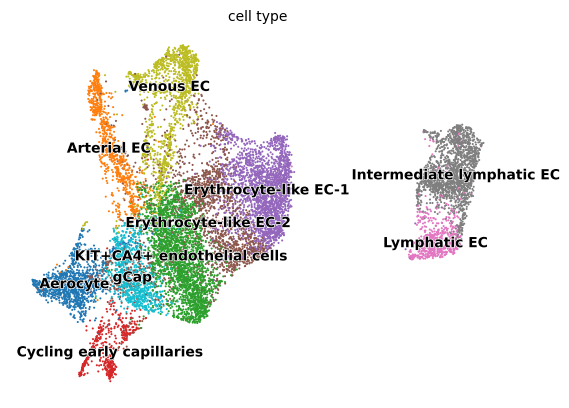

In [7]:
scv.pl.umap(adata, color='cell_type', palette=endo_palette)

In [8]:
cells = ['Cycling early capillaries', 'Aerocyte', 'gCap']
selected = adata[adata.obs['cell_type'].isin(cells)]

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
import rpy2.rinterface_lib.callbacks
import logging
import rpy2.robjects as ro

from rpy2.robjects import pandas2ri
import anndata2ri
from rpy2.robjects.conversion import localconverter

pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/spencer/.local/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:263: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/spencer/.local/lib/python3.8/site-packages/rpy2/robjects/numpy2ri.py:205: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '


In [10]:
%%R
library(anndata)
library(slingshot)
library(Matrix)
library(tradeSeq)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



    consider that it could be called from a Python process. This
    results in a quasi-obligatory segfault when rpy2 is evaluating
    R code using it. On the hand, rpy2 is accounting for the
    fact that it might already be running embedded in a Python
    process. This is why:
    - Python -> rpy2 -> R -> reticulate: crashes
    - R -> reticulate -> Python -> rpy2: works

    The issue with reticulate is tracked here:
    https://github.com/rstudio/reticulate/issues/208
    

R[write to console]: Loading required package: princurve

R[write to console]: Loading required package: TrajectoryUtils

R[write to console]: Loading required package: SingleCellExperiment

R[write to console]: Loading required package: SummarizedExperiment

R[write to console]: Loading required package: MatrixGenerics

R[write to console]: Loading required package: matrixStats

R[write to console]: 
Attaching package: ‘MatrixGenerics’


R[write to console]: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars

In [11]:
sc.pp.highly_variable_genes(adata, n_top_genes = 5000, flavor='cell_ranger', subset=False)

In [12]:
scv.pp.pca(selected)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
dimred = selected.obsm['X_pca'][:,:30]
clustering = selected.obs['cell_type']
counts = pd.DataFrame(selected.layers['spliced'].todense().T, index=selected.var.index.values, 
                  columns = selected.obs.index.values, dtype=float)
batch = selected.obs['batch']

In [14]:
%%R -i dimred -i clustering -i counts -i batch

counts = as.matrix(counts)

set.seed(1)

sds <- slingshot(data = dimred, clusterLabels = clustering, start.clus='Cycling early capillaries',
                end.clus=c('Aerocyte', 'gCap'),
                 approx_points = 300, thresh = 0.01, stretch = 0.8, allow.breaks = TRUE, shrink = 0.99)

sds <- as.SlingshotDataSet(sds)

pseudotime <- slingPseudotime(sds)#, na = FALSE)
cellWeights <- slingCurveWeights(sds)

write.csv(pseudotime, 'data/capillary_pseudotimes.csv')

pseudotime <- slingPseudotime(sds, na = FALSE)
cellWeights <- slingCurveWeights(sds)

batch = factor(batch)
U <- model.matrix(~batch)

sce <- fitGAM(counts = counts, U=U, pseudotime = pseudotime, cellWeights = cellWeights,
                 nknots = 6, verbose = TRUE)

table(rowData(sce)$tradeSeq$converged)

assoRes <- associationTest(sce, lineages=TRUE)
write.csv(assoRes, 'data/capillary_genes.csv')
head(assoRes)

rowData(sce)$assocRes <- assoRes
assocRes <- rowData(sce)$assocRes

Genes1 <-  rownames(assocRes)[
  which(p.adjust(assocRes$pvalue_1, "fdr") <= 0.01)
]

Genes2 <-  rownames(assocRes)[
  which(p.adjust(assocRes$pvalue_2, "fdr") <= 0.01)
]

write.csv(Genes1, 'data/1Genes_capillary.csv')
write.csv(Genes2, 'data/2Genes_capillary.csv')


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
R[write to console]: Error in withVisible({ : object 'asdasdasd' not found

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 2: useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE. 

R[write to console]: 3: useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE. 

R[write to


Error in withVisible({ : object 'asdasdasd' not found


RInterpreterError: Failed to parse and evaluate line '\ncounts = as.matrix(counts)\n\nset.seed(1)\n\nsds <- slingshot(data = dimred, clusterLabels = clustering, start.clus=\'Cycling early capillaries\',\n                end.clus=c(\'Aerocyte\', \'gCap\'),\n                 approx_points = 300, thresh = 0.01, stretch = 0.8, allow.breaks = TRUE, shrink = 0.99)\n\nsds <- as.SlingshotDataSet(sds)\n\npseudotime <- slingPseudotime(sds)#, na = FALSE)\ncellWeights <- slingCurveWeights(sds)\n\nwrite.csv(pseudotime, \'data/capillary_pseudotimes.csv\')\nasdasdasd\n#pseudotime = as.data.frame(pseudotime)\n\n#with localconverter(ro.default_converter + pandas2ri.converter):\n#    pd_pseudotime= ro.conversion.rpy2py(pseudotime)\n\n#pd_pseudotime = pandas2ri.ri2py()\n\n#icMat <- evaluateK(counts = counts, sds = sds, k = 3:6, \n#                   nGenes = 10, verbose = T)\n\npseudotime <- slingPseudotime(sds, na = FALSE)\ncellWeights <- slingCurveWeights(sds)\n\nbatch = factor(batch)\nU <- model.matrix(~batch)\n\nsce <- fitGAM(counts = counts, U=U, pseudotime = pseudotime, cellWeights = cellWeights,\n                 nknots = 6, verbose = TRUE)\n\ntable(rowData(sce)$tradeSeq$converged)\n\nassoRes <- associationTest(sce, lineages=TRUE)\nwrite.csv(assoRes, \'monocle_trajectories/capillary_genes.csv\')\nhead(assoRes)\n\nrowData(sce)$assocRes <- assoRes\nassocRes <- rowData(sce)$assocRes\n\nGenes1 <-  rownames(assocRes)[\n  which(p.adjust(assocRes$pvalue_1, "fdr") <= 0.01)\n]\n\nGenes2 <-  rownames(assocRes)[\n  which(p.adjust(assocRes$pvalue_2, "fdr") <= 0.01)\n]\n\nwrite.csv(Genes1, \'monocle_trajectories/1Genes_capillary.csv\')\nwrite.csv(Genes2, \'monocle_trajectories/2Genes_capillary.csv\')\n'.
R error message: "Error in withVisible({ : object 'asdasdasd' not found"

In [13]:
pst = pd.read_csv('data/capillary_pseudotimes.csv', index_col=0)
pst

,Lineage1,Lineage2
Cell-1,18.350746,18.548266
Cell-2,25.650968,NaN
Cell-3,19.011924,18.629884
Cell-4,19.287121,19.536059
Cell-5,18.554830,18.061782
...,...,...
Cell-2543,NaN,24.903438
Cell-2544,24.021637,NaN
Cell-2545,24.771687,NaN
Cell-2546,NaN,25.209132


In [14]:
selected.obs['pseudotime1'] = pst.Lineage1.values
selected.obs['pseudotime2'] = pst.Lineage2.values

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


saving figure to file figures/Aerocyte_trajectory.pdf


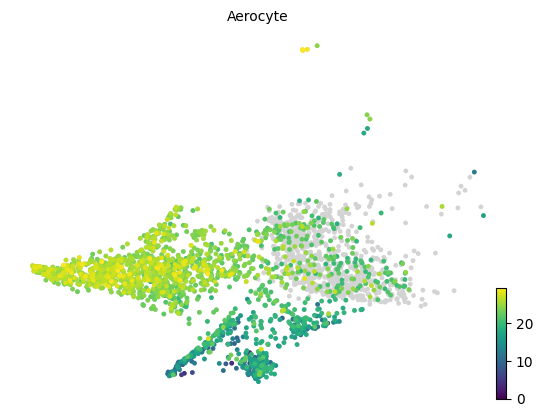

saving figure to file figures/gCap_trajectory.pdf


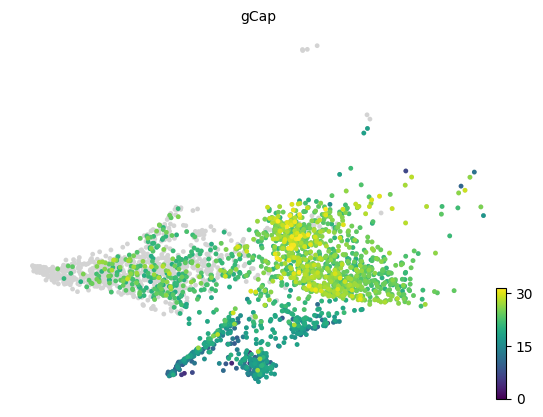

In [15]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
scv.pl.umap(selected, color='#D3D3D3', ax=ax, show=False)
scv.pl.umap(selected, color='pseudotime1',show=True, ax=ax, title='Aerocyte',        
            save='figures/Aerocyte_trajectory.pdf')

fig,ax=plt.subplots()
scv.pl.umap(selected, color='#D3D3D3', ax=ax, show=False)
scv.pl.umap(selected, color='pseudotime2',show=True, ax=ax, title='gCap',
           save='figures/gCap_trajectory.pdf')

In [16]:
selected.obs['UMAP1'] = selected.obsm['X_umap'][:,0]
selected.obs['UMAP2'] = selected.obsm['X_umap'][:,1]
selected.obs[['pseudotime1', 'pseudotime2', 
              'cell_type', 'UMAP1', 'UMAP2']].to_csv('data/Endothelial_slingshot.csv')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
aero_genes = pd.read_csv('data/1Genes_capillary.csv')['x'].values
gcap_genes = pd.read_csv('data/2Genes_capillary.csv')['x'].values

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
selected_aero_genes = aero_genes[[ bool(not x.startswith(("RPS", "RPL"))) for x in aero_genes]]
selected_gcap_genes = gcap_genes[[ bool(not x.startswith(("RPS", "RPL"))) for x in gcap_genes]]

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
gc.collect()
selected.layers['spliced'] = selected.X.copy()
selected.layers['unspliced'] = selected.X.copy()
gc.collect()
scv.pp.neighbors(selected, n_pcs=30, n_neighbors=30)
gc.collect()
scv.pp.moments(selected, n_pcs=None, n_neighbors=None)

computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [20]:
aero_genes  = []
for x in selected.var_names:
    if x in selected_aero_genes:
        aero_genes.append(x)

pd.DataFrame(selected[~selected.obs.pseudotime1.isnull()][np.argsort(selected[~selected.obs.pseudotime1.isnull()].obs['pseudotime1']),list(aero_genes)].layers['Ms'],
             index=selected[~selected.obs.pseudotime1.isnull()].obs['pseudotime1'],
            columns=list(aero_genes)).round(decimals=3).to_csv('data/Endothelial_Aerocyte_trajectory_heatmap.csv')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


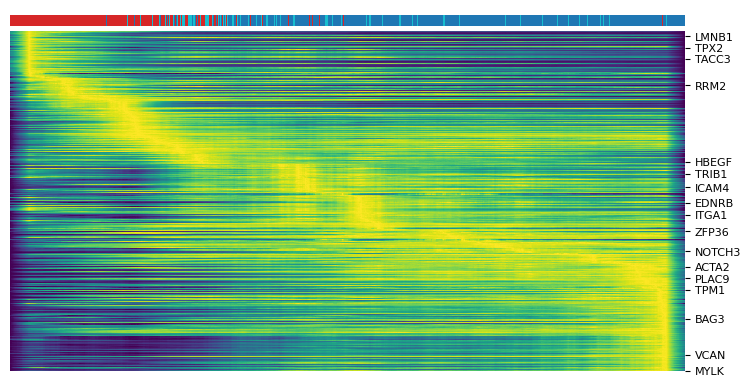

In [22]:
gc.collect()

g= scv.pl.heatmap(selected[~selected.obs.pseudotime1.isnull()], 
                  sortby='pseudotime1', var_names=selected_aero_genes,
              n_convolve=100, col_color='cell_type', yticklabels=True, show=False, sort=True)

yticklabels = []
yticks = []
for x in g.ax_heatmap.get_yticklabels():
    if x.get_text() in list(degs[cells].values[:30].flatten())+['EDNRB']:
        if x.get_text() == 'EDNRB' or len(yticks) ==0 or (np.abs(np.array(yticks) - x.get_position()[1])).min() > 25:
            yticklabels.append(x.get_text())
            yticks.append(x.get_position()[1])


g.ax_heatmap.set(yticks=yticks, yticklabels=yticklabels)
g.ax_heatmap.tick_params(labelsize=8)
plt.savefig('figures/Aerocyte_trajectory_heatmap.png')
plt.show()

In [21]:
gcap_genes  = []
for x in selected.var_names:
    if x in selected_gcap_genes:
        gcap_genes.append(x)

pd.DataFrame(selected[~selected.obs.pseudotime2.isnull()][np.argsort(selected[~selected.obs.pseudotime2.isnull()].obs['pseudotime2']),list(gcap_genes)].layers['Ms'],
             index=selected[~selected.obs.pseudotime2.isnull()].obs['pseudotime2'],
            columns=list(gcap_genes)).round(decimals=3).to_csv('data/Endothelial_gCap_trajectory_heatmap.csv')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


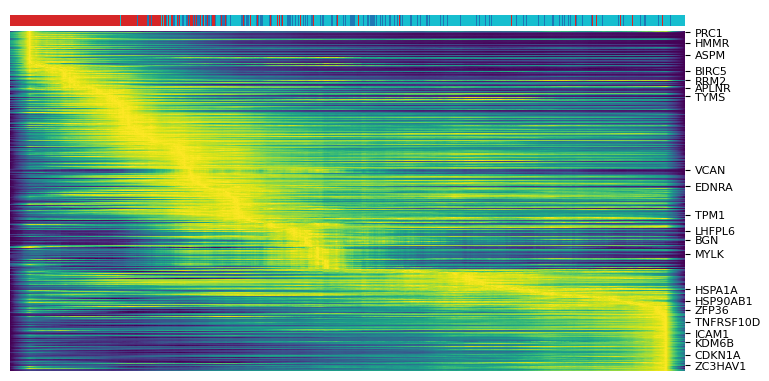

In [23]:
gc.collect()

g= scv.pl.heatmap(selected[~selected.obs.pseudotime2.isnull()], sortby='pseudotime2', var_names=selected_gcap_genes,
              n_convolve=100, col_color='cell_type', yticklabels=True, show=False, sort=True)

yticklabels = []
yticks = []
for x in g.ax_heatmap.get_yticklabels():
    if x.get_text() in list(degs[cells].values[:30].flatten())+['APLNR']:
        if x.get_text() == 'APLNR' or len(yticks) ==0 or (np.abs(np.array(yticks) - x.get_position()[1])).min() > 40:
            yticklabels.append(x.get_text())
            yticks.append(x.get_position()[1])


g.ax_heatmap.set(yticks=yticks, yticklabels=yticklabels)
g.ax_heatmap.tick_params(labelsize=8)
plt.savefig('figures/gCap_trajectory_heatmap.png')
plt.show()